*created 08 Jan 2026, Julian Mak (whatever with copyright, do what you want with this)

### As part of material for OCES 5303 "AI and Machine Learning in Ocean Science" delivered at HKUST

For the latest version of the material, go to the public facing [GitHub](https://github.com/julianmak/OCES5303_ML_ocean) page.


---
# 01: Python recap, data handling and basic uses of `sklearn`

The course here will use [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) through [Jupyter notebooks](https://jupyter.org/). I chose Python because:
* It's free (i.e. not [MATLAB](https://en.wikipedia.org/wiki/MATLAB) or SPSS)
* It's not [R](https://en.wikipedia.org/wiki/R_(programming_language)) (I hate R syntax personally, but it will also work)
* Python is used widely, has a lot of packages built in, pretty mature with userbase and support (an appropriate Google search help with debugging most of the time)
* Familiarity to me

I will openly admit I do not write Python in a Pythonic way: I started on MATLAB until MATLAB screwed up vector graphics outputs for me, so I rage quit and went to Python. The code provided here is certainly not the cleanest way to do it (this is sometimes by design), nor is it the most idiomatic way of doing it, but it should (mostly?) work and do the intended thing.

## <span style="color:red">!!! NOTE !!!</span>

The content here largely assumes some familiarity with Python and some of the associated packages (see the list of packages to be loaded). If you are unfamiliar with those, you can have a look at the course content for OCES 3301 available at https://github.com/julianmak/OCES3301_data_analysis.

---
# 1. Recapping Python through various data handling and using `sklearn`

Just going to load and do basic manipulations of data that will be used for demonstration purposes.

> ## Key Objective(s)
> 1. The present notebook is to check you can in fact load (almost) all the data that will be used for the course. If you are having trouble now then it really should to be fixed, because otherwise there will be issues for the remaining content...
> 2. Demonstrates some Python loading/plotting approaches.
> 3. Demonstrates some manipulations of array data, as well as `pandas` and `xarray` dataframes.
> 4. Basic utility and syntax of the `scikit-learn` package.
> 5. Highlight some inherent randomness in data-driven methods.
> 6. Given the above, highlight the need to evaluate robustness of model skill (which requires defining what is meant by "skill")

Going to load a bunch of relevant libraries first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

try:
    import cftime
except ModuleNotFoundError:
    !pip install cftime
    import cftime

# optional: install the additional bits for xarray if you don't have it already (for Argo)
# !pip install xarray[io]

import xarray as xr

---
## a) Numerical data: python generated

Name of the game for most of this course is to turn the data we read into numbers, manipulate those into a form that the Python data science + Machine Learning packages understands, and then feed them in the relevant algorithms. So it's probably useful to start with those.

Below is a simple example of the function
\begin{equation*}
    f = \sin(t)
\end{equation*}
modified in various ways (this is the same example used in `07_time_series` of OCES 3301). I am going to generate an ***array*** of numbers for $t$, and this is then fed into a function that spits out another array.

> Note: For displaying to screen I will mostly use ***fstrings*** (e.g. `f"STUFF"` with the preface `f` before the string marks `" "`), although occasionally I will use `r` if I need some specific formatting.

In [2]:
t_vec   = np.linspace(0, 2.0 * np.pi, 31)
f       =   np.sin(t_vec)
f_pos   = 2*np.sin(t_vec)
f_neg   =  -np.sin(t_vec)
f_shift =   np.sin(t_vec - np.pi / 2.0)

print(f"t_vec = {t_vec}")
print(" ")
print(f"f = {f}")
print(" ")

t_vec = [0.         0.20943951 0.41887902 0.62831853 0.83775804 1.04719755
 1.25663706 1.46607657 1.67551608 1.88495559 2.0943951  2.30383461
 2.51327412 2.72271363 2.93215314 3.14159265 3.35103216 3.56047167
 3.76991118 3.97935069 4.1887902  4.39822972 4.60766923 4.81710874
 5.02654825 5.23598776 5.44542727 5.65486678 5.86430629 6.0737458
 6.28318531]
 
f = [ 0.00000000e+00  2.07911691e-01  4.06736643e-01  5.87785252e-01
  7.43144825e-01  8.66025404e-01  9.51056516e-01  9.94521895e-01
  9.94521895e-01  9.51056516e-01  8.66025404e-01  7.43144825e-01
  5.87785252e-01  4.06736643e-01  2.07911691e-01  1.22464680e-16
 -2.07911691e-01 -4.06736643e-01 -5.87785252e-01 -7.43144825e-01
 -8.66025404e-01 -9.51056516e-01 -9.94521895e-01 -9.94521895e-01
 -9.51056516e-01 -8.66025404e-01 -7.43144825e-01 -5.87785252e-01
 -4.06736643e-01 -2.07911691e-01 -2.44929360e-16]
 


The above as shown is not hugely useful since it is just a dump of numbers, but we can visualise this accordingly. Left plot shows it as a function of time (e.g. $[f_0, f_1, \ldots]$ against $[t_0, t_1, \ldots]$), right plots shows it as one function plotted against another (e.g. $[f_0, f_1, \ldots]$ against $[g_0, g_1, \ldots]$).

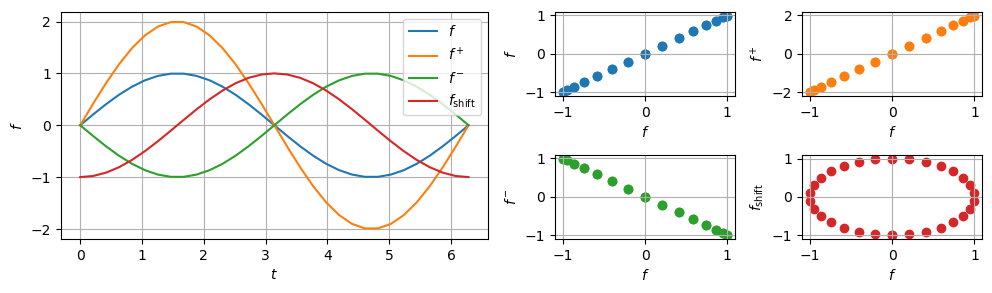

In [3]:
# award winning graph

# 2x4 grid, firsrt graph takes up a 2x2 space located first at the upper left corner (0, 0)
fig = plt.figure(figsize=(10, 3))
ax = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax.plot(t_vec, f    ,   "C0", label=r"$f$")
ax.plot(t_vec, f_pos,   "C1", label=r"$f^+$")
ax.plot(t_vec, f_neg,   "C2", label=r"$f^-$")
ax.plot(t_vec, f_shift, "C3", label=r"$f_{\rm shift}$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$f$")
ax.grid()
ax.legend()

# subsequent graphs are 1x1 but with a change in the location
ax = plt.subplot2grid((2, 4), (0, 2))
ax.scatter(f, f, color="C0")
ax.set_xlabel(r"$f$")
ax.set_ylabel(r"$f$")
ax.grid()

ax = plt.subplot2grid((2, 4), (0, 3))
ax.scatter(f, f_pos, color="C1")
ax.set_xlabel(r"$f$")
ax.set_ylabel(r"$f^+$")
ax.grid()

ax = plt.subplot2grid((2, 4), (1, 2))
ax.scatter(f, f_neg, color="C2")
ax.set_xlabel(r"$f$")
ax.set_ylabel(r"$f^-$")
ax.grid()

ax = plt.subplot2grid((2, 4), (1, 3))
ax.scatter(f, f_shift, color="C3")
ax.set_xlabel(r"$f$")
ax.set_ylabel(r"$f_{\rm shift}$")
ax.grid()

fig.tight_layout(pad=1.0) # give the graph a bit of padding

> <span style="color:red">**Q.**</span> This was previously used to demonstrate lag (linear) correlations. Convince yourself that the correlations of the right hand side subplots are (going clockwise) 1, 1, 0 and -1, corresponding accordingly to what you would suspect from looking at the entries in the left hand side subplot. Convince yourself that the **lagged correlation** looks like a sine (or cosine) curve.

Can do stuff for multi-dimension data, but going to do this together with reading data from files.

---
## b) Reading numerical data from file

<img src="https://i.imgur.com/rKcpZzr.jpg" width="400" alt='cursed panda'>

I am going to rely on `pandas` and/or `xarray` to read the data provided from file (or remotely via an internet connection if the files are small enough), and then do some manipulations and/or plotting with these; these can be done in principle via other means (see OCES 3301 for example).

## El Nino 3.4 data

This is a text file shown in the lecture slides and is just a text file. Going to load this remotely and spit out the contents.

In [4]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    path = "elnino34_sst.data"
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES5303_ML_ocean/refs/heads/main/elnino34_sst.data"
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

data = pd.read_csv(path)
data

loading data remotely


,1948 2019
0,1948 -99.99 -99.99 -99.99 -99.99 -99.99 -99.9...
1,1949 -99.99 -99.99 -99.99 -99.99 -99.99 -99.9...
2,1950 24.55 25.06 25.87 26.28 26.18 26.4...
3,1951 25.24 25.71 26.90 27.58 27.92 27.7...
4,1952 26.67 26.74 27.17 27.80 27.79 27.1...
...,...
70,2018 25.57 25.97 26.48 27.31 27.73 27.7...
71,2019 27.19 27.46 28.09 28.44 28.48 28.1...
72,-99.99
73,Nino 3.4 Index using ersstv5 from CPC


Generally `pandas` ***tries*** to read things assuming sensible layout etc., but that can fail if the data is not cleaned up (and most data is uncleaned). Here we have headers and misc. things we don't really need, leading to things being read into a single block.

It is generally a good idea to have a look at the raw data file first to see what it consists and anticipate what things you might need to do. In this case, optional arguments needs to be provided (e.g. delimiter, separator, etc...)

In [5]:
# can give it a few more details to make it easier for pandas to help us
df = pd.read_csv(path,
          sep='\s+',     # this used to be delim_whitespace=True,
          names=["year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
          skipfooter=4,  # chop out some lines
          skiprows=1,    # chop out some unnecessary lines
          false_values=-99.99,
          engine="python")
df = df.replace(-99.99, np.nan) # replace missing values with NaNs (not a number)
df = df.set_index("year")       # sets the index to be the year column
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,27.05,27.17,27.75,28.52,28.85,28.90,28.75,28.79,28.93,29.08,29.42,29.26
2016,29.11,29.01,28.90,28.72,28.23,27.69,26.82,26.28,26.14,25.98,25.94,26.10
2017,26.12,26.67,27.32,28.03,28.30,28.06,27.54,26.70,26.29,26.15,25.74,25.62


Notice there are `NaN`s in the data, which itself is not an issue. The pandas dataframe `df` has `72 rows x 12 columns`, which is 72 years of data every month over 12 months. We can do a quick dirty plot of the data.

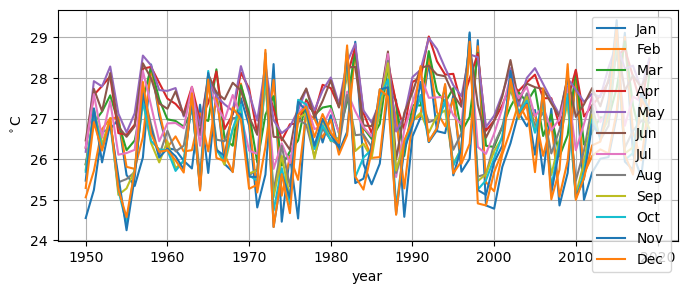

In [6]:
# not an award winning graph

fig = plt.figure(figsize=(8, 3))
ax = plt.axes()
df.plot(ylabel=r"${}^\circ\mathrm{C}$", ax=ax)  # pass some keywords in
ax.grid()

In this case it is treating `months` (the header) as a category, i.e. plotting all the January temperatures as a function of `year`. This isn't necessary what we want: we probably want it as a time-series with increasing time.

There are ways to do the reshaping in pandas, but for demonstration I am going to do this in native `numpy`:

1. Load the pandas `df` frame into a numpy array with `df.values`.
2. I want to keep the column ordering but remove the rows (e.g. have 1st row of 12, then 2nd row of 12 etc.), to be done via `.reshape(SIZE)`.
   * Above can be done with `.flatten()` also.
3. I am additionally going to compute the linear ***line of best fit*** (cf. `07_time_series` in OCES 3301), which I will need if I want to detrend the data to get the ***anomalies*** (although I don't use it here).

> <span style="color:red">**Q.**</span> by default `.reshape()` and `.flatten()` both use `order=C` as a default option, which gives the right thing in this case. Try this with `order=F` and convince yourself that is the wrong thing to do (the positions of `NaN`s would help).

data has shape (72, 12)
data now has shape (864,) after reshape or flatten
 


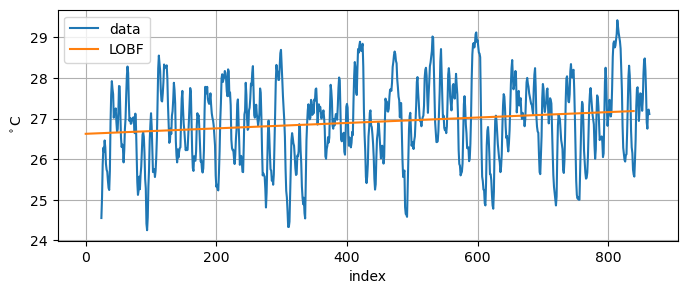

In [7]:
data = df.values
print(f"data has shape {data.shape}")
data = data.reshape(data.size)  # data.size gives the total the number of entries
print(f"data now has shape {data.shape} after reshape or flatten")
print(" ")

# line of best fit via polyval (only because I don't want to load scipy)
# need to remove NaNs first
data_dum = data[~np.isnan(data)]  # find the NOT NaNs
p = np.polyfit(np.arange(len(data_dum)), data_dum, 1)

fig = plt.figure(figsize=(8, 3))
ax = plt.axes()
ax.plot(data, label="data")
ax.plot(np.polyval(p, np.arange(len(data_dum))), label="LOBF")
ax.set_xlabel("index")
ax.set_ylabel(r"${}^\circ\mathrm{C}$")
ax.grid()
ax.legend();

> <span style="color:red">**Q.**</span> I was lazy and didn't provide the time array. Create a time array and do a proper regression (be careful of units). Then you can get a magnitude of a global warming trend from `p[0]` (which is the gradient of the straight line).
>
> <span style="color:red">**Q.**</span> Do the above but with `scipy` or `sklearn`.

See extended exercises for more things to do.

## Penguin data

<img src="https://www.boredpanda.com/blog/wp-content/uploads/2020/08/cats-standing-like-penguins-fb-png__700.jpg" width="500" alt='cursed penguins'>

The [Palmer Penguins](https://cran.r-project.org/web/packages/palmerpenguins/readme/README.html) data was compiled as a replacement/alternative to the standard [iris data](https://en.wikipedia.org/wiki/Iris_flower_data_set) because of racism/eugenics reasons of Ronald Fisher (look it up if you are interested). A mildly touched up version is given here as `penguins.csv` (or see link below in the code); I removed some columns and some `NaN`s. We are going to be using this dataset quite a bit.

In [8]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    path = "penguins.csv"
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES5303_ML_ocean/refs/heads/main/penguins.csv"
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

df = pd.read_csv(path)
df

loading data remotely


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
337,Chinstrap,55.8,19.8,207.0,4000.0
338,Chinstrap,43.5,18.1,202.0,3400.0
339,Chinstrap,49.6,18.2,193.0,3775.0
340,Chinstrap,50.8,19.0,210.0,4100.0


So this one is a text file but notice the headers are also loaded and are in fact useful because it tells you the data entries and units (which is more than can be said for a lot of data...) Notice also the `species` column is text while others are numbers; we will end up converting entries in `species` to numerical values in due course.

Zeroth step of data analysis/exploration is to actually plot out the data first. Here are some random things I thought that could be done to demonstrate plotting/visualising and calling of things from `pandas`.

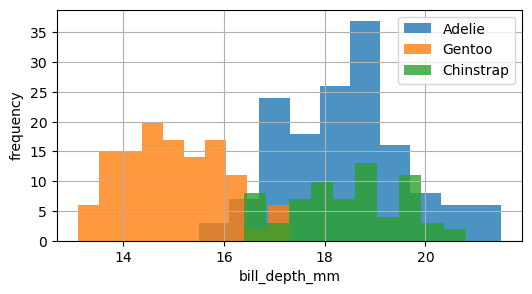

In [9]:
# histograms of one of the randomly chosen variables cycling the species

target_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
target_var = np.random.choice(target_vars)

fig = plt.figure(figsize=(6, 3))
ax = plt.axes()

for species in df["species"].unique():   # pick out all unique entries under `species`
    ax.hist(df[df["species"] == species][target_var], label=species, alpha=0.8)

ax.set_xlabel(f"{target_var}")
ax.set_ylabel("frequency")
ax.grid()
ax.legend();

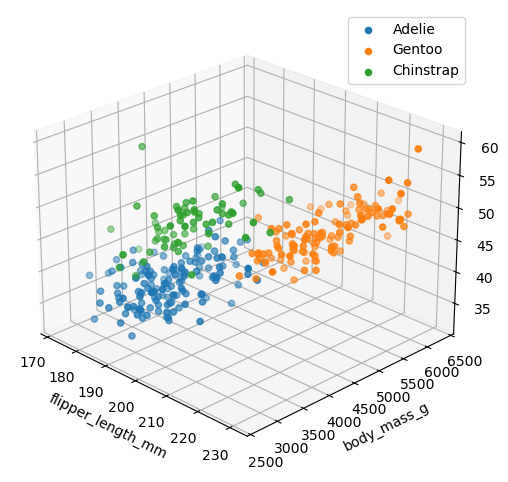

In [10]:
# do a 3d plot of three random choices of variables

from mpl_toolkits import mplot3d  # load a package for 3d plots

target_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
target_var = np.random.choice(target_vars, 3, replace=False)  # 3 unique choices

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")

for species in df["species"].unique():   # pick out all unique entries under `species`
    ax.scatter(df[df["species"] == species][target_var[0]],
               df[df["species"] == species][target_var[1]],
               df[df["species"] == species][target_var[2]],
               label=species
               )
ax.set_xlabel(f"{target_var[0]}")
ax.set_ylabel(f"{target_var[1]}")
ax.set_zlabel(f"{target_var[2]}")
ax.grid(lw=0.5, zorder=0)
ax.legend()
ax.view_init(25, -45)

> <span style="color:red">**Q.**</span> In the histogram plot I was deliberately lazy and didn't provide pre-defined bin edges (so `ax.hist` ended up choosing it). Pre-define the bin edges and do the binning of the data so that data from every species uses the same bins. You may want to use `np.histogram` instead, and then throw the outputs from there into `ax.hist` accordingly.
>
> <span style="color:red">**Q.**</span> The histogram plot shows frequency for now, but turn that into a probability either manually or using the inbuilt functionality.
>
> <span style="color:red">**Q.**</span> Explore other combinations of scatter plots in both 2d and 3d.

## Gridded data

By gridded I mean these are data that have pre-defined co-ordinates that sits on a regular grid/array, such as (longitude, latitude) or similar. An example of this is satellite data: initially the data is per swarth, but given enough swarths some filling in can be done and the data put on a regular grid that is more useful for end users. One ongoing application of ML in oceanography would be instead of waiting for enough swarths, maybe you could use ML to fill in the gaps instead.

The one I am showing here is from a simulation (sample from [NEMO ORCA0083-N01](https://gws-access.jasmin.ac.uk/public/nemo/)). The original dataset is REALLY big, so I downsized it quite significantly. The data is in the [NetCDF](https://en.wikipedia.org/wiki/NetCDF) format which is supposed to be self-describing (the one I made is not quite that). Going to open this with `xarray`.

In [11]:
# would do "local" for this one, because the filesize is not small (~45 MB)
# could do this once and for all (as long as you save the file) with
# !wget https://github.com/julianmak/OCES5303_ML_ocean/raw/refs/heads/main/current_speed.nc

import fsspec  # for caching the file if using remote option

option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    file = "current_speed.nc"
elif option == "remote":
    # do a local caching (downloads a file to cache)
    print("loading data remotely")
    file_loc = "https://github.com/julianmak/OCES5303_ML_ocean/raw/refs/heads/main/current_speed.nc"
    file = fsspec.open_local(f"simplecache::{file_loc}", filecache={'cache_storage': '/tmp/fsspec_cache'})
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

df = xr.open_dataset(file)
df

loading data remotely


<xarray.Dataset> Size: 47MB
Dimensions:  (time: 73, lat: 400, lon: 400)
Coordinates:
  * time     (time) object 584B 2010-02-09 04:00:00 ... 2011-02-04 04:00:00
  * lat      (lat) float32 2kB -63.49 -63.45 -63.41 ... -44.47 -44.41 -44.35
  * lon      (lon) float32 2kB 131.2 131.3 131.4 131.5 ... 164.3 164.4 164.5
Data variables:
    speed    (time, lat, lon) float32 47MB ...
Attributes:
    title:    sliced out and processed data from ORCA0083-N01
    comment:  made by Julian Mak

This one is `(time, lat, lon)`, and although I didn't write the units in it is `m s-1`. Here we can select one time and plot out the data as a map.

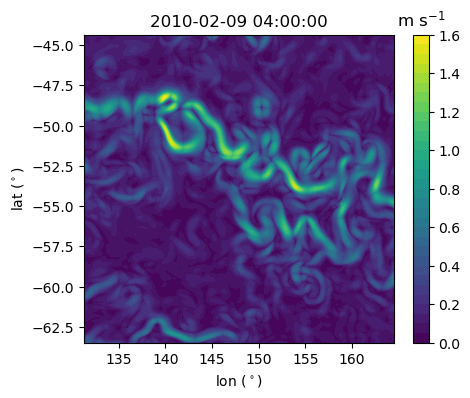

In [12]:
# using contourf here, could do pcolor also
t_ind = 0

fig = plt.figure(figsize=(5, 4))
ax = plt.axes()
cs = ax.contourf(df["lon"], df["lat"], df["speed"][t_ind, :, :], 31)
ax.set_xlabel(r"lon $(^\circ)$")
ax.set_ylabel(r"lat $(^\circ)$")
ax.set_title(df["time"][0].values)  # load as string to remove other xarray descriptors
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mathrm{m}\ \mathrm{s}^{-1}$");

> <span style="color:red">**Q.**</span> Plot out longitudinal or meridional slices instead.
>
> <span style="color:red">**Q.**</span> Select one location and plot out the time series.
>
> <span style="color:red">**Q.**</span> Make a movie out of the data.

## Argo data

[Argo](https://argo.ucsd.edu/data/) is a system of autonomous floats that are put into the ocean, floating around with the currents, and periodically does vertical sections to take in-situ measurements of things like temperature, salinity, pressure, and so forth down to about 2000 m depth; see below for the schematic. There are increasing interest in [BGC-Argo](https://biogeochemical-argo.org/) that measure quantities relevant to biogeochemistry, and [deep Argo](https://argo.ucsd.edu/expansion/deep-argo-mission/) that go down to 4000 m; see OCES 3301 for more description.

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1-768x424.png" width="600" alt='Argo'>

> NOTE: The namesake of Argo is related to the [JASON](https://en.wikipedia.org/wiki/Jason-1) satellites if you know your Greek mythology.

The float data here are vertical sections at specific locations of space, and can be regarded as data that is more "raw" than the gridded data. The data provided here is in the `zarr` format that can be opened with `xarray`.

Some care needs to be taken to obtain a copy of this. Would highly recommend not loading this remotely, because the content is big.

> <span style="color:red">!!! NOTE !!!</span> (JM 15 Apr 2025): If you are on Colab, you probably need to mount and do a separate upload of the data.
> 1) Go to https://drive.google.com/drive/folders/1JJ0cpshu6-JE8wp93UsHuqy6V33rQy7s?usp=sharing
> 2) Download the folder
> 3) Upload that to your own instance of Colab
> 4) Mount with `from google.colab import drive; drive.mount('/content/drive')` and then proceed as below

In [13]:
# mount the drive
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# data is slightly out-of-date and will fail with "consolidated" option but will load
# silencing the warning

## !!!!!!
# make sure the data is somewhere in the drive
# modify to the data path (to where you saved the data), and
# give a full path, e.g.
# argo_data_path = '/content/drive/MyDrive/oces5303_ml/GLOB_HOMOGENEOUS_variables.zarr'
# df = xr.open_zarr(argo_data_path, consolidated=False)
# df
#
# I have the data so on my laptop I do the following
df = xr.open_zarr("GLOB_HOMOGENEOUS_variables.zarr", consolidated=False)

So note that the data is arranged as `(N_PROF, DEPTH)`, and `TIME`, `LATITUDE` and `LONGITUDE` are the variables tagged to `N_PROF`. Sample plot looks like this.

Text(0.5, 1.0, 'Salinity at -100.0 m')

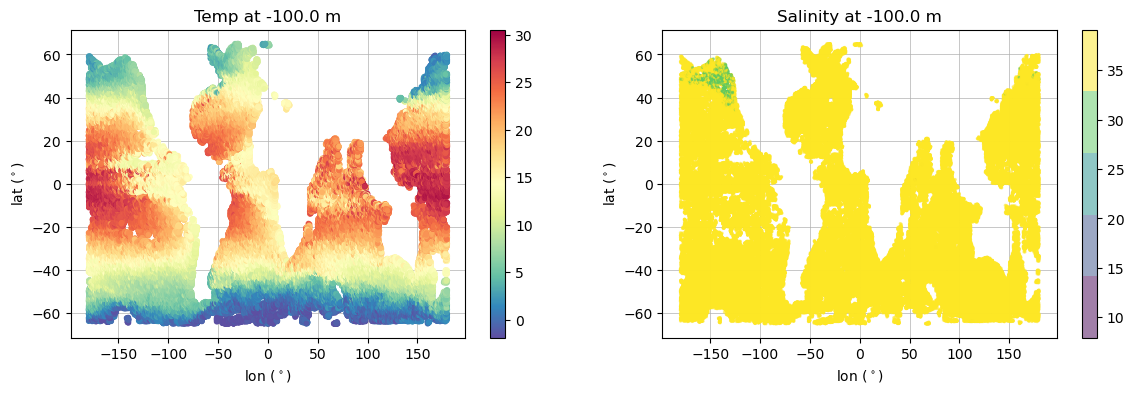

In [15]:
# plot out what the observation data actually looks like in geographical space

nl = 20 # change this index to plot different depths (as an index entry)

fig = plt.figure(figsize=(14, 4))

# temperature
ax = plt.subplot(1, 2, 1)
cs = ax.scatter(df.LONGITUDE, df.LATITUDE, 10, df.TEMP[:,nl],
                cmap=plt.get_cmap('Spectral_r'), zorder=3)
ax.set_xlabel(r"lon ($^\circ$)")
ax.set_ylabel(r"lat ($^\circ$)")
plt.colorbar(cs)
ax.grid(lw=0.5, zorder=0)
ax.set_title(f"Temp at {df.DEPTH[nl].values} m")

# salinity
ax = plt.subplot(1, 2, 2)
cs = ax.scatter(df.LONGITUDE, df.LATITUDE, 2, df.PSAL[:,nl],
                alpha=.5, cmap=plt.get_cmap('viridis', 5), zorder=3)
ax.set_xlabel(r"lon ($^\circ$)")
ax.set_ylabel(r"lat ($^\circ$)")
plt.colorbar(cs)
ax.grid(lw=0.5, zorder=0)
ax.set_title(f"Salinity at {df.DEPTH[nl].values} m")

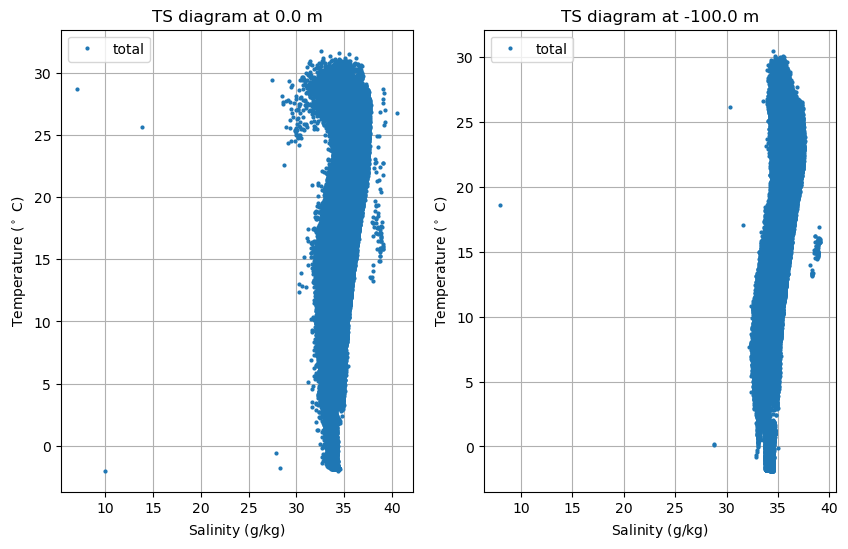

In [16]:
# plot out TS-diagrams at different depths

nl = 0

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(df.PSAL[:, nl], df.TEMP[:, nl], "o", markersize=2, label="total")
ax.grid()
plt.legend()
ax.set_ylabel(r'Temperature ($^\circ\ \mathrm{C}$)')
ax.set_xlabel(r'Salinity ($\mathrm{g}/\mathrm{kg}$)')
ax.set_title(f"TS diagram at {df.DEPTH[nl].values} m")

nl = 20

ax = plt.subplot(1, 2, 2)
ax.plot(df.PSAL[:, nl], df.TEMP[:, nl]  , "o", markersize=2, label="total")
ax.grid()
plt.legend()
ax.set_ylabel(r'Temperature ($^\circ\ \mathrm{C}$)')
ax.set_xlabel(r'Salinity ($\mathrm{g}/\mathrm{kg}$)')
ax.set_title(f"TS diagram at {df.DEPTH[nl].values} m");

> <span style="color:red">**Q.**</span> So from the TS diagram you notice that are some outliers that probably should be removed (e.g. water that is too fresh is unlikely under typical oceanic conditions). Come up with criteria to drop these points from `df`, and do the plots again. This is an important part of data pre-processing before throwing it into the ML algorithmcs, following the ***Garbage In Garbage Out*** principle.
>
> <span style="color:red">**Q.**</span> Subset these by geographical locations (e.g. Atlantic Ocean using whatever defensible criterion you like), and either plot these separately, or plot them together with the labels. This is a thing that is worth looking into now because you will be doing something like this in assignment 1.
>

---

## c) Images as numerical data

Just like we can visualise data as an image, we can sometimes go the other way and get data out of an image:

1) One possible example might be that you have chlorophyll concentration measurements, which gives some shades of green in the image. Then a useful thing might be the reverse: you can consider the case of measuring greeness from a satellite to infer for the chlorophyll concentration.
2) I want to automatically classify species of fish or penguins or whatever from a long video segment.
3) I have broken images that I may want to fill out.

I am going to use some `jpg` files I have handy to demonstrate images as arrays.

loading data remotely


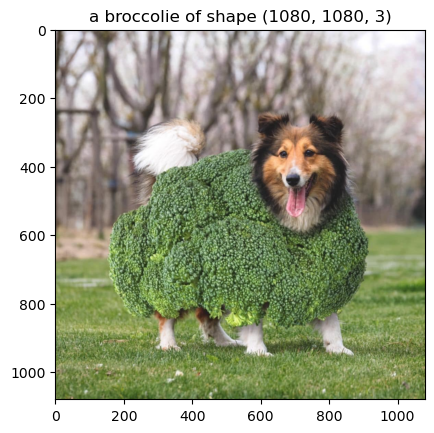

In [17]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    file = "broccollie.jpeg"
elif option == "remote":
    # do a local caching (downloads a file to cache)
    print("loading data remotely")
    file_loc = "https://github.com/julianmak/OCES5303_ML_ocean/raw/refs/heads/main/broccollie.jpeg"
    file = fsspec.open_local(f"simplecache::{file_loc}", filecache={'cache_storage': '/tmp/fsspec_cache'})
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

data = plt.imread(file)
ax = plt.axes()
ax.imshow(data)
ax.set_title(f"a broccolie of shape {data.shape}");

As can seen from querying the loaded array, the array is of size `(pixels, pixels, RGB)` where `RGB` is the strength of (red, green blue), and this goes from 0 to 255 for reasons you can look up if you want.

It is just an array so all the usual things can be done to it. The example below converts the RGB image to grayscale using the formula
\begin{equation*}
    \mathrm{gray} = 0.299 \mathrm{Red} + 0.587 \mathrm{Green} + 0.114 \mathrm{Blue}.
\end{equation*}
The formula assumes the RGB values lie between 0 and 1 so some conversion is needed, but that's easy (just divide by 255).

> NOTE: For plotting you could of course just plot is as grayscale, but this is for demonstrating how to manipulate arrays.

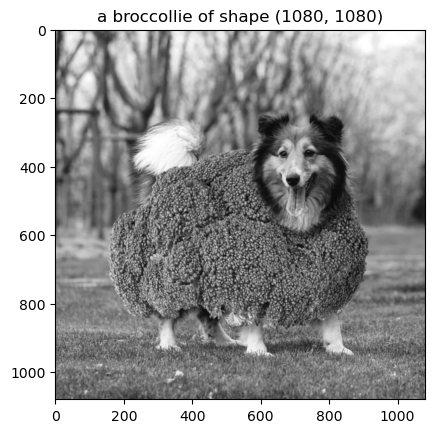

In [18]:
# normalise data then convert
data_bw = data / 255
data_bw = 0.288 * data_bw[:, :, 0] + 0.587 * data_bw[:, :, 1] + 0.114 * data_bw[:, :, 2]

ax = plt.axes()
ax.imshow(data_bw, cmap="gray")
ax.set_title(f"a broccollie of shape {data_bw.shape}");

> <span style="color:red">**Q.**</span> Consider passing these through blurring or sharpening fitlers. `scipy` has a few, or you can do it from scratch by specifying the convolution or deconvolution kernels accordingly (cf. `08_times_series` and `10_fun_with_maps` in OCES 3301, session 9 in this course later).

Below case is a stack of images that are written into a `csv` file, where one dimension denotes all the pixels, and the other dimension denotes the sample number.

In [19]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    path = "cat.csv"
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES5303_ML_ocean/refs/heads/main/cat.csv"
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

# going to transpose this so the shape is (image number, pixels)
df = pd.read_csv(path, header=None).T
df

loading data remotely


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,64,64,64,64,64,77,77,77,77,77,...,64,64,77,77,64,77,77,64,64,61
1,23,23,20,20,9,9,9,4,4,4,...,108,108,108,108,89,65,51,31,23,9
2,250,250,250,244,244,244,244,244,232,232,...,244,244,244,232,244,244,244,244,232,244
3,137,137,137,144,151,151,151,158,151,151,...,74,89,89,78,78,78,100,102,124,124
4,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,45,37,45,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,69,71,73,76,77,79,77,81,82,83,...,79,77,78,70,65,66,65,88,99,66
76,28,32,28,38,22,14,19,18,19,21,...,154,148,152,148,145,144,136,141,144,144
77,60,50,63,53,43,50,64,71,70,50,...,107,114,112,104,101,94,92,105,118,104
78,223,224,225,230,233,230,240,235,228,229,...,177,178,176,182,185,184,180,180,182,177


The file contains data for 80 images of cats of 64 by 64 pixels each ($64^2 = 4096$). This one requires unflattening/reshaping the arrays for the images to make sense. For ML applications with actually feed in flattened data into algorithms; see later notebooks.

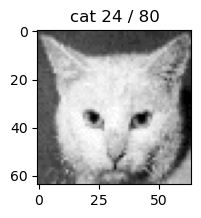

In [20]:
# load data, reshape data and then plot one of the guys out

cats = df.values
ind = np.random.randint(cats.shape[0])

# transpose back for image display purposes
fig = plt.figure(figsize=(2, 2))
ax = plt.axes()
ax.imshow(np.reshape(cats[ind, :], (64, 64)).T, cmap="gray")
ax.set_title(f"cat {ind+1} / {cats.shape[0]}");

> <span style="color:red">**Q.**</span> As a python exercise, try and use a loop to plot five of these but randomly choosing the image number to plot. Make sure the randomly selected indices are distinct.
>
> <span style="color:red">**Q.**</span> You can try reshaping it in different ways (e.g. instead of `.reshape(64, 64)` try other numbers that multiple to `4096`), and convince yourself the choice taken here is the only sensible one.
>
Point here is that if you can deal with these sample images you can in principle deal with other images (e.g. fish/coral/snails/satellite/remote sensing images).

---

## d) Regression as an optimisation problem

For the below demonstration I am going to use the `penguins` data, which I load in the cell below and do a quick plot of for completeness.

In [21]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    path = "penguins.csv"
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES5303_ML_ocean/refs/heads/main/penguins.csv"
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

df = pd.read_csv(path)

loading data remotely


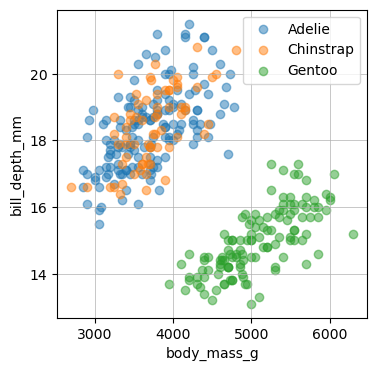

In [22]:
# do a 2d plot of two specific variables in the penguins data

target_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
ind = [3, 1]

fig = plt.figure(figsize=(4, 4))
ax = plt.axes()
for species in np.sort(df["species"].unique()):   # pick out all unique entries under `species`
    ax.scatter(df[df["species"] == species][target_vars[ind[0]]],
               df[df["species"] == species][target_vars[ind[1]]],
               label=species,
               alpha=0.5,  # fade this for demonstration later
               )
ax.set_xlabel(f"{target_vars[ind[0]]}")
ax.set_ylabel(f"{target_vars[ind[1]]}")
ax.grid(lw=0.5, zorder=0)
ax.legend();

If we regard ML as finding a best model $f$ that maps inputs $X$ to outputs $Y$ (i.e. regression), then by the "best model" we mean some $f$ that minimises the ***mismatches*** between predictions $\hat{Y}$ and given data $Y$. The problem then ultimately depends on what you define as the mismatch. A standard choice is the $L^p$ family of norms given by
\begin{equation*}
    \|\hat{Y} - Y\|_{L^p} = \left(\int |\hat{Y} - Y|^p\; \mathrm{d}\mu \right)^{1/p}.
\end{equation*}
The most commonly used ones of these are $L^2$ or ***mean squared error*** (MSE) and $L^1$ or ***mean absolute error*** defined by
\begin{equation*}
    \mathrm{MSE} = \|\hat{Y} - Y\|^2_{L^2} = \int |\hat{Y} - Y|^2\; \mathrm{d}\mu, \qquad \mathrm{MAE} = \|\hat{Y} - Y\|_{L^1} = \int |\hat{Y} - Y|\; \mathrm{d}\mu,
\end{equation*}
where the integral is invariably replaced by sums in contexts encountered in this course.

For the training of the ML model a choice of mismatch (i.e. the ***loss function***, or the ***objective function*** in the classical optimisation literature) would need to be specified, and $L^2$ or MSE is often used. On the other hand, we can also evalute a model's skill using MSE and MAE measures (or any other ones we think are relevant).

> NOTE: Again, "standard" does not necessarily mean best.
>
> $\mathrm{d}\mu$ is related to a "measure"; not going to elaborate what that means except that it is a fundamental object in the theory of probability, and is more fundamental than the "metric".
>
> $L^2$ or MSE is often chosen to be the loss presumably because $L^2$ is differentiable and the resulting space is (presumably) a ***Hilbert space***, which has desirable properties. Not actually sure if this is the intention of most practicioners though...

To see how this works we do need to choose a model, so I am going to choose Linear Regression from the `sklearn` library (`LinearRegression` below) partly to demostrate syntax for `sklearn`. Recall that linear regression does
\begin{equation*}
    \hat{Y} = aX + b,
\end{equation*}
where the name of the game is to find numbers $a$ and $b$ such that the $L^2$ mismatches are minimised. Since it is constructed to be a $L^2$ mminimiser we expect the related MSE will be small, but note that this says nothing about MAE. We are going to predict $Y$ from $X$.

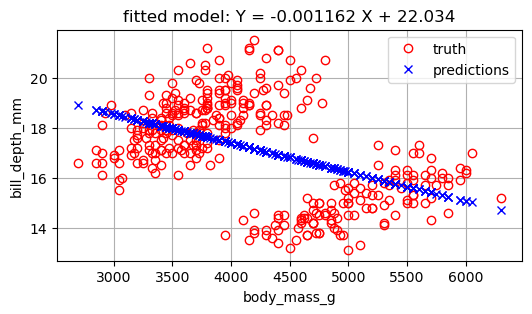

In [23]:
from sklearn.linear_model import LinearRegression

# same syntax as above, (n_samples, n_features)
X = df[target_vars[ind[0]]].values.reshape(-1, 1)
Y = df[target_vars[ind[1]]].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

fig = plt.figure(figsize=(6, 3))
ax = plt.axes()
ax.plot(X, Y, 'ro', fillstyle="none", label="truth")
ax.plot(X, Y_pred, 'bx', label="predictions")
ax.set_xlabel(target_vars[ind[0]])
ax.set_ylabel(target_vars[ind[1]])
ax.grid()
ax.legend()
ax.set_title(f"fitted model: Y = {model.coef_[0, 0]:.6f} X + {model.intercept_[0]:.3f}");

The model is expected to suck in terms of skill because the data is clearly not linear. Below compares the relevant errors as done through `sklearn` as well as a native way of doing this using `numpy`, as well as computing some other relevant statistics.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import r_regression

# as computed by sklearn
MSE_sklearn = mean_squared_error(Y, Y_pred)
MAE_sklearn = mean_absolute_error(Y, Y_pred)

# as computed by hand
MSE_np = np.mean(np.abs(Y - Y_pred)**2)
MAE_np = np.mean(np.abs(Y - Y_pred))

print(f"MSE from sklearn = {MSE_sklearn:.4f}")
print(f"MSE from numpy   = {MSE_np:.4f}")
print(f"MAE from sklearn = {MAE_sklearn:.4f}")
print(f"MAE from numpy   = {MAE_np:.4f}")
print(" ")
print(f"R^2 score of model = {model.score(X,Y):.4f}")
print(f"correlation coeff of model = {r_regression(X, Y.ravel())[0]:.4f}")
print(" ")

MSE from sklearn = 3.0224
MSE from numpy   = 3.0224
MAE from sklearn = 1.4221
MAE from numpy   = 1.4221
 
R^2 score of model = 0.2227
correlation coeff of model = -0.4719
 


Coinvince yourself the $R^2$ score is consistent that there is not really a linear correlation going on, and the negative linear correlation coefficient is also consistent with the overall shape of the data.

> <span style="color:red">Q.</span> Check that the $R^2$ and linear correlation coefficient computed above coincide with that computed from `scipy`.

We will do more in terms of modelling with `sklearn` over the next two sessions. For now however we move on to some other useful and important utilities of `sklearn`.

---
## e) Dataset splitting and scaling/transformations

You could argue it is better practice to withold some data for testing purposes, because otherwise the model sees "everything" so of course it is able to reproduce those things. The usual approach in ML is then to split the data into:

* ***Training data***, which is passed in during model training
* ***Testing data***, which is **not** exposed to model during training, and used to evalute the ***skill*** of a model (whatever you want skill to mean)
* ***Validation data***, which is for tuning internal ***hyperparameters***, and is exposed to the model during training

Mostly going to deal with the first two. Two "obvious" (!?) questions to ask for the dataset splitting would mainly concern whether you want a specific selection, and how much data you want in each dataset. There is some arbitrariness in this and answer might be context dependent...

Without knowing what the data looks like, probably the most sensible thing to do is to just select data randomly (i.e. sampling from a uniform distribution). Doing a 80:20 training testing dataset split also seems reasonable. You can do this by hand, or use the `train_test_split` in `sklearn` to do this also. Below demostrates the syntax of that and provides some illustration of what is going on.

> NOTE: Below I've actually loaded the arrays into memory, but I could have passed in `pandas` arrays.

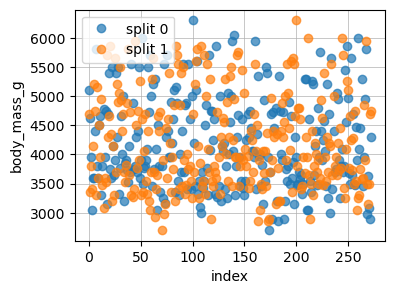

In [25]:
# train_test_split syntax demonstration
from sklearn.model_selection import train_test_split

# select data based on choice of "ind" above:
X = df[target_vars[ind[0]]].values  # actually load the data into memory

# going to subset data twice to demonstrate a point

fig = plt.figure(figsize=(4, 3))
ax = plt.axes()
for i in range(2):
    X_train, X_test = train_test_split(X, test_size=0.2) # 20% of data in test
    ax.plot(X_train, f'C{i}o', alpha=0.7, label=f"split {i}")
ax.set_xlabel("index")
ax.set_ylabel(f"{target_vars[ind[0]]}")
ax.grid(lw=0.5, zorder=0)
ax.legend();

It is not that clear above, but the splitting is random and the data selected is not overlapping. It is probably clearer in the case where I select two variables and do this as a scatter plot. The below code demonstrates also how you can pass in multiple arrays to be split.

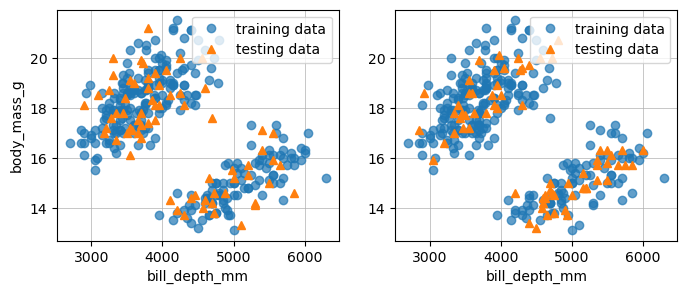

In [26]:
# select data based on choice of "ind" above:
X = df[target_vars[ind[0]]].values  # actually load the data into memory
Y = df[target_vars[ind[1]]].values

# going to subset data twice to demonstrate a point
fig = plt.figure(figsize=(8, 3))
for i in range(2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    ax = plt.subplot(1, 2, i+1)
    ax.plot(X_train, Y_train, f'C0o', alpha=0.7, label="training data")
    ax.plot(X_test, Y_test, f'C1^', label="testing data")
    ax.set_xlabel(f"{target_vars[ind[1]]}")
    if i == 0:
        ax.set_ylabel(f"{target_vars[ind[0]]}")
    ax.grid(lw=0.5, zorder=0)
    ax.legend()

For reproducibity (e.g. in an assignment say), you can specify `random_state=SEED` in the `train_test_split` to force it to split in a specific way (basically specifying the random seed). The below basically shows two identical images.

> <span style="color:red">Q.</span> Check the split arrays are in fact exactly identical in the contents and the order when the random seed is specified (there should be no permutations in the data).

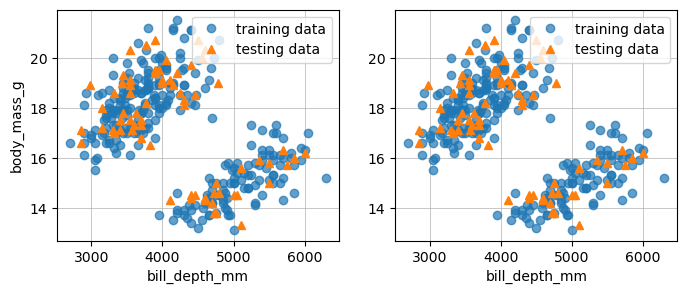

In [27]:
# why 42 ???
seed = 42

# going to subset data twice to demonstrate a point
fig = plt.figure(figsize=(8, 3))
for i in range(2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
    ax = plt.subplot(1, 2, i+1)
    ax.plot(X_train, Y_train, f'C0o', alpha=0.7, label="training data")
    ax.plot(X_test, Y_test, f'C1^', label="testing data")
    ax.set_xlabel(f"{target_vars[ind[1]]}")
    if i == 0:
        ax.set_ylabel(f"{target_vars[ind[0]]}")
    ax.grid(lw=0.5, zorder=0)
    ax.legend()

If you have't changed my default settings then one thing you can argue is that the units of the selected data are not even the same (one is a length and the other is a mass), so how can we even sensibly/meaningfully compare them? Further, given a ML model depends on data input, would this discrepancy not cause problems for the model?

Quick answer to the above are that "you can't/shouldn't" and "yes it will do", although the question (and thus the related answer) is probably much more subtle... Without going into too much detail, it really is context dependent, but a standard (!?) thing to do is to normalise and scale the data distributions accordingly.

> NOTE: "Standard" does not mean it is the "best" all the time.
>
> I like to try and think of problems from a geometry point of view, and the way I'd phrase the above problem is effectly asking what is the ***metric*** of interest. From a machine learnig point of view, see [information geometry](https://en.wikipedia.org/wiki/Information_geometry) and the textbook by the late [David MacKay](https://www.inference.org.uk/mackay/itila/book.html) for an overview of this.

One way to do this is to ***assume*** (the "assume" part is important) the data follows a Gaussian/normal distribution, i.e. for data (random variables) $X$ and $Y$, we have $X \sim \mathcal{N}(\mu_X, \sigma_X)$ and $Y \sim \mathcal{N}(\mu_Y, \sigma_Y)$. While each of the data sets would have their own mean and standard deviations $\mu$ and $\sigma$, we can remove the individual the mean and scale by the standard deviation so the transformed data follow a standardised Gaussian distribution, i.e. $\tilde{X}, \tilde{Y}\sim \mathcal{N}(0, 1)$. Then we can compare them at least from the distribution point of view. The `StandardScaler()` below basically does this. I am going throw the data in individually first to demonstrate some basic syntax.

> NOTE: `sklearn` expects data arrays to have the shape `(n_samples, n_features)`. The 1d arrays I throw in will fail although the warning will ask for a `.reshape`; the one we want is `.reshape(-1, 1)` in this case (it basically just adds an extra dimension to it).

shape before = (342,)
shape after  = (342, 1)
 


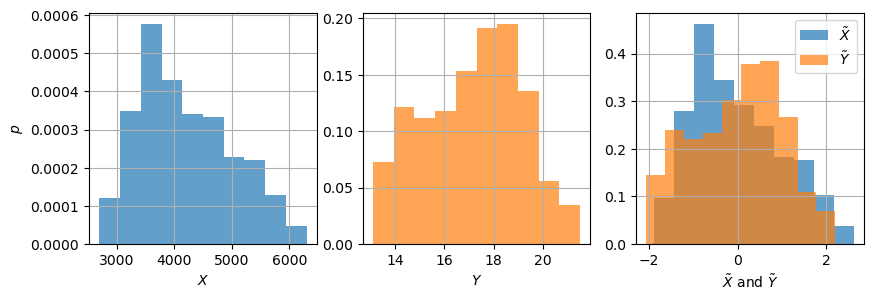

In [28]:
# demonstration of standard scaler: comparisons of PDFs (i.e. histograms)
from sklearn.preprocessing import StandardScaler

X = df[target_vars[ind[0]]].values  # actually load the data into memory
Y = df[target_vars[ind[1]]].values

# sklearn syntax: expects (n_samples, n_features), reshape below is needed
print(f"shape before = {X.shape}")
X = X.reshape(-1, 1)
print(f"shape after  = {X.shape}")
print(" ")
Y = Y.reshape(-1, 1)

# initialise scaler, then fit, and then transform
scaler_X = StandardScaler()
scaler_X.fit(X)   # data is n samples 1 feature
X_scale = scaler_X.transform(X)
scaler_Y = StandardScaler()
scaler_Y.fit(Y)
Y_scale = scaler_Y.transform(Y)

fig = plt.figure(figsize=(10, 3))

# raw unscaled histograms
ax = plt.subplot(1, 3, 1)
ax.hist(X, density=True, color="C0", alpha=0.7)
ax.set_xlabel(r"$X$")
ax.set_ylabel(r"$p$")
ax.grid()

ax = plt.subplot(1, 3, 2)
ax.hist(Y, density=True, color="C1", alpha=0.7)
ax.set_xlabel(r"$Y$")
ax.grid()

ax = plt.subplot(1, 3, 3)
ax.hist(X_scale, density=True, color="C0", alpha=0.7, label=r"$\tilde{X}$")
ax.hist(Y_scale, density=True, color="C1", alpha=0.7, label=r"$\tilde{Y}$")
ax.grid()
ax.set_xlabel(r"$\tilde{X}$ and $\tilde{Y}$")
ax.legend();

Hopefully you are convinced that it would be ridiculous to try and plot the left and middle one together on the same plot given the disparity of scales.

The syntax below does multiple things at the same time.

> NOTE: `sklearn` expects data arrays to have the shape `(n_samples, n_features)`, so I may need to be a bit careful about how I jam the two arrays together. I avoid it completely by just reloading the relevant data, but the commented code shows another way to do it (I can think of at least five other ways to do it).

data shape is (342, 2), already of right form
 


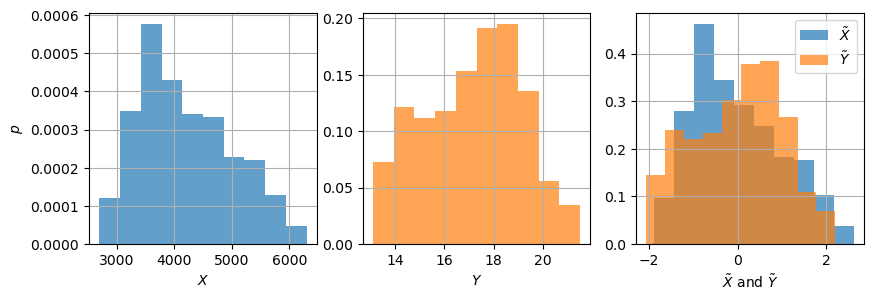

In [29]:
# reload the data
data = df[[target_vars[ind[0]], target_vars[ind[1]]]].values
print(f"data shape is {data.shape}, already of right form")
print(" ")

# could also stack the two arrays together
# X = df[target_vars[ind[0]]].values.reshape(-1, 1)
# Y = df[target_vars[ind[1]]].values.reshape(-1, 1)
# data = np.concatenate((X, Y), axis=-1)  # stack at the feature axis which is the last one

# don't even bother defining the scaler object
data_scale = StandardScaler().fit_transform(data)

fig = plt.figure(figsize=(10, 3))

# raw unscaled histograms
ax = plt.subplot(1, 3, 1)
ax.hist(data[:, 0], density=True, color="C0", alpha=0.7)
ax.set_xlabel(r"$X$")
ax.set_ylabel(r"$p$")
ax.grid()

ax = plt.subplot(1, 3, 2)
ax.hist(data[:, 1], density=True, color="C1", alpha=0.7)
ax.set_xlabel(r"$Y$")
ax.grid()

ax = plt.subplot(1, 3, 3)
ax.hist(data_scale[:, 0], density=True, color="C0", alpha=0.7, label=r"$\tilde{X}$")
ax.hist(data_scale[:, 1], density=True, color="C1", alpha=0.7, label=r"$\tilde{Y}$")
ax.grid()
ax.set_xlabel(r"$\tilde{X}$ and $\tilde{Y}$")
ax.legend();

There are other ways to scale the data; see extended exercises later.

Given the randomness in the data and train/test split, two things you may want to ask are:

1. How robust is the model? (Did you get a model with good skill because you got lucky?)
2. How generalisable is your model?

We will deal with these a bit more in the next session when we have more possibility for variation in the models.

----------------
# More involved exercises with this notebook

## 1) Delay embedding (Takens' embedding)

Taking the sine curve example, consider doing the plots like the right hand side, but instead do e.g.
\begin{equation*}
    [f_1, f_2, f_3, f_4, \ldots, f_N]
\end{equation*}
against
\begin{equation*}
    [f_0, f_1, f_2, f_3, \ldots, f_{N-1}],
\end{equation*}
i.e. shift the array by one index (or more if you want). You will need to be careful about array sizes and calling array entries that are less than zero (this will lead to wrap around, e.g. `f[-1] = f[N]` and `f[-2] = f[N-1]`; the sine curve example is periodic so it doesn't matter, but it might matter for more general cases).

You may want to consider writing this as a subroutine that takes in an array and spits out two arrays, one with a shifted index, and both having the intended array size.

If you plot it out you should get ellipses with different eccentricities depending on the time-lag. Convince yourself that actually makes sense.

The above is related to [Takens' theorem](https://en.wikipedia.org/wiki/Takens%27s_theorem) and we may or may not come back to this in the bonus lectures, e.g. [Empirical Dynamic Modelling (EDM)](https://en.wikipedia.org/wiki/Empirical_dynamic_modeling), [Topological Data Analysis (TDA)](https://en.wikipedia.org/wiki/Topological_data_analysis).

In [30]:
# baseline arrays for doing lag embedding with
t_vec = np.linspace(0, 2.0 * np.pi, 61)
f     = np.sin(t_vec)

## 2) El Nino data manipulation

Starting from the El Nino 3.4 time series data, probably detrend it to get the anomalies. Provide a threshold criteria to classify El Nino and La Nina events using an analogous criterion to e.g. https://ggweather.com/enso/oni.htm. You may or may not want to compute some smoothing / running averages.

Could also compute the power spectrum or similar to obtain the magnitude of frequencies; see OCES 3301 on how this might be done.

## 3) Turtle + penguin data

Have a look and see what is in this dataset: https://www.kaggle.com/datasets/abbymorgan/penguins-vs-turtles. This may be used for one of the marked assignments.

## 4) Satellite data

Obtain some satellite grid and/or track data. Would recommend having a look at the [Sentinel Data Space](https://dataspace.copernicus.eu/data-collections/copernicus-sentinel-data). This may or may not be a useful place to get data for the extended project.

## 5) Other ways of scaling

Have a look at [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html) and explore other ways of scaling the data.

You could also try scaling things according to non-Gaussian pdfs, but you may need to do this yourself. Could also consider ***non-dimensionalisation*** based on specific processes (e.g. if you've done my OCES 2003 you would have seen things like the Rossby/Reynolds/Rayleigh/Ekman number; this may show up in the extra material of this course).

## 6) $L^1$ minimising linear regression

This was previously posted as a (hard-ish) problem to do in OCES 3301. Linear regression by default do $L^2$ (mean squared error or MSE) minimisation, but that says nothing about the $L^1$ (mean absolute error or MAE), or indeed other norms. See how you would create a $L^1$ minimising linear regression predictor, and show the resulting object does seem to minimise $L^1$, reduces weighting on the outliers, but says nothing about the $L^2$ or other errors.

I would do it (and have done it beofre) through `scipy.optimize`.

## 7) Some datasets in `sklearn`

Have a look and play around with the (already) processed data in `sklearn`; see [here](https://scikit-learn.org/stable/datasets.html) for some descriptions.

A notable example from there is the famous Mauna Loa CO2 data that gives the Keeling curve; see [here](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-co2-py) for a related tutorial that provides instructions on how to read some data. (You can have a look at ***Gaussian Processes*** emulator if you like, although I am not touching on it in this course.)